##  Loading the Data

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import pandas as pd

# Load the datasets
red_wine_df = pd.read_csv('wine+quality\\winequality-red.csv', delimiter=";")
white_wine_df = pd.read_csv('wine+quality\\winequality-white.csv', delimiter=";")

In [55]:
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [56]:
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data Display, Inspection 

In [57]:
# Add 'wine_type' column
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

# Combine the DataFrames
df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [59]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Exploratory Data Analysis(EDA)

In [61]:
# Stastistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Analyze the distribution of the target variable 

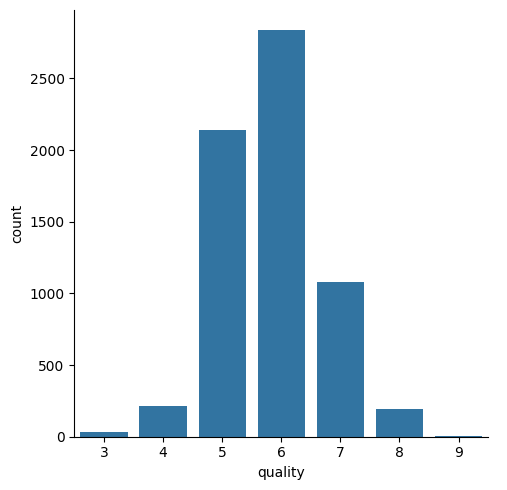

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.catplot(x = 'quality', kind = 'count', data=df)
plt.show()

In [63]:
# Display the new value counts
print(df['quality'].value_counts())

# Display the new data types
print(df['quality'].info())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB
None


In [64]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [65]:
# Convert the 'quality' column into a binary numerical format.
# A score of 7 or higher is considered 'good' (1), and anything below is 'not good' (0).
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [66]:
df_encoded = pd.get_dummies(df, columns=['wine_type'])

In [67]:
# Assuming 'df_encoded' is your DataFrame with boolean columns.
df_encoded['wine_type_red'] = df_encoded['wine_type_red'].astype(int)
df_encoded['wine_type_white'] = df_encoded['wine_type_white'].astype(int)

# Check the data types to confirm the conversion
print(df_encoded[['wine_type_red', 'wine_type_white']].dtypes)


wine_type_red      int64
wine_type_white    int64
dtype: object


In [68]:
df_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red,wine_type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0,1


## Correlation Analysis

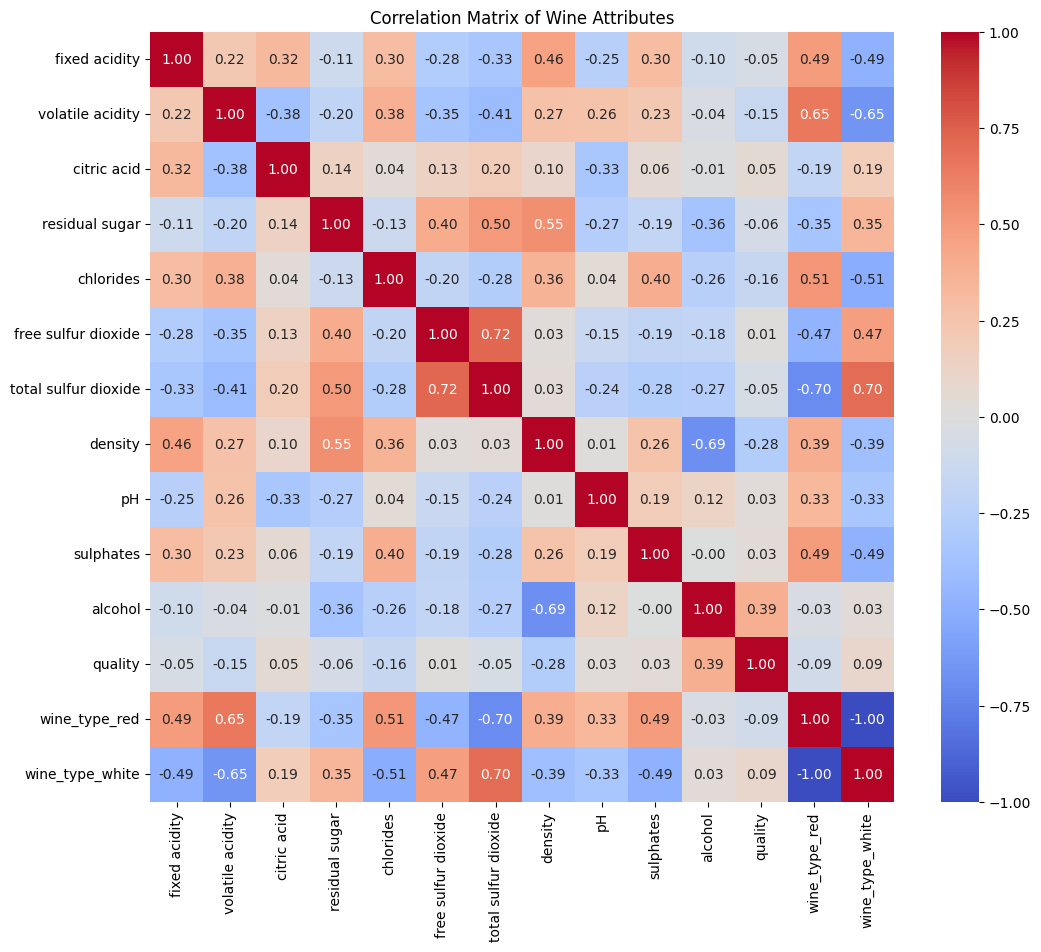


Correlation with Quality:
quality                 1.000000
alcohol                 0.390486
wine_type_white         0.087479
citric acid             0.054444
sulphates               0.033971
pH                      0.028149
free sulfur dioxide     0.014767
fixed acidity          -0.049447
total sulfur dioxide   -0.051226
residual sugar         -0.063992
wine_type_red          -0.087479
volatile acidity       -0.151714
chlorides              -0.161781
density                -0.275441
Name: quality, dtype: float64


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

# Print the correlations with 'quality' for a quick view
print("\nCorrelation with Quality:")
print(correlation_matrix['quality'].sort_values(ascending=False))

In [70]:
import numpy as np

# List of all numerical columns to check for outliers
numerical_cols = df_encoded.columns.drop('quality')

# Create a copy to work with
df_no_outliers = df_encoded.copy()

# Iterate over each numerical column to detect and remove outliers
for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print(f"Original number of rows: {df_encoded.shape[0]}")
print(f"Number of rows after outlier removal: {df_no_outliers.shape[0]}")

Original number of rows: 6497
Number of rows after outlier removal: 4238


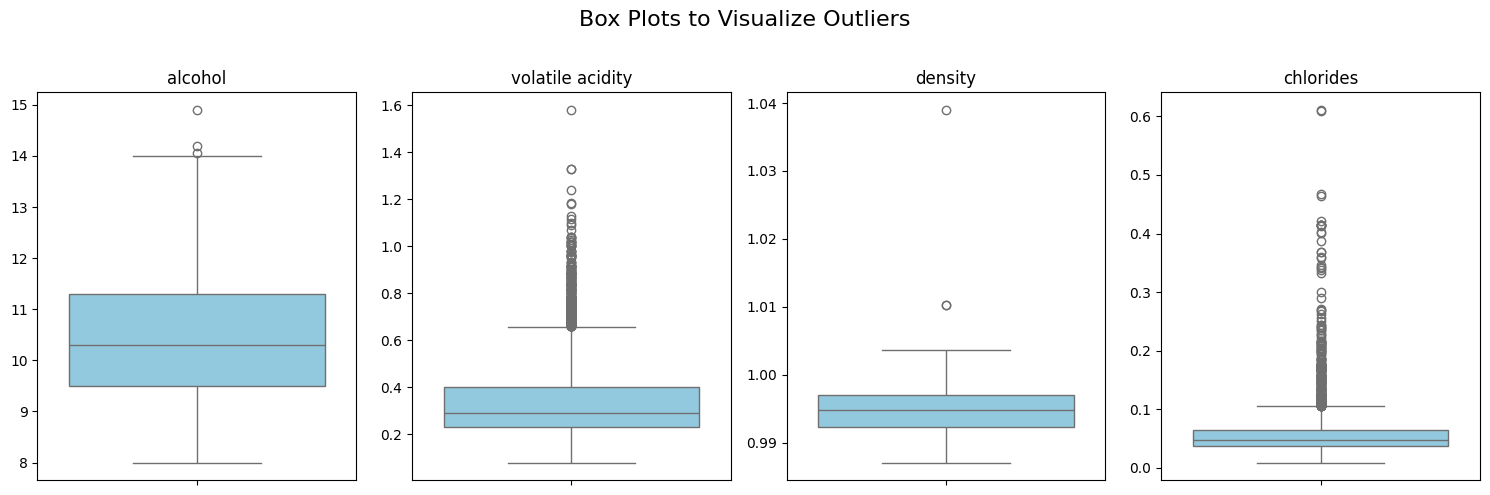

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the numerical columns to visualize
columns_to_plot = ['alcohol', 'volatile acidity', 'density', 'chlorides']

# Create a figure with subplots
plt.figure(figsize=(15, 5))
plt.suptitle('Box Plots to Visualize Outliers', fontsize=16)

# Plot each column
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df_encoded[col], color='skyblue')
    plt.title(col)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Train-Test Split

In [72]:
print("\nStep 3: Splitting data into training and testing sets...")
X = df_no_outliers.drop('quality', axis=1)
y = df_no_outliers['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data splitting complete.")



Step 3: Splitting data into training and testing sets...
Data splitting complete.


### Build and Train Models with Pipelines ---

In [73]:

print("\nStep 4: Building and training models...")
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Model training complete.")


Step 4: Building and training models...
Training Logistic Regression model...
Training Random Forest model...
Model training complete.


## Evaluate and Compare Models


Step 5: Evaluating and comparing model performance...

--- Logistic Regression Model Evaluation ---
Accuracy: 0.7807
Precision: 0.5545
Recall: 0.2843
F1-Score: 0.3758


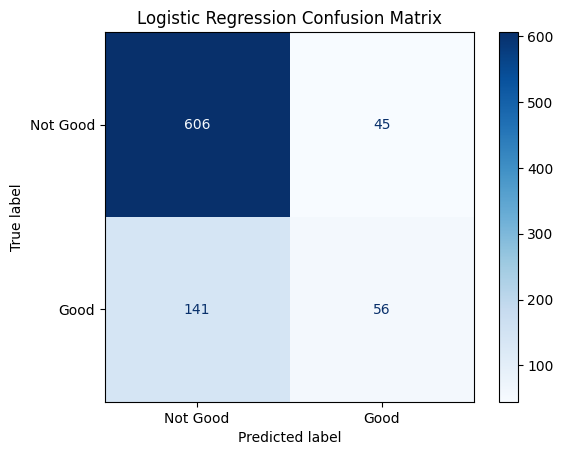


--- Random Forest Model Evaluation ---
Accuracy: 0.8738
Precision: 0.7778
Recall: 0.6396
F1-Score: 0.7019


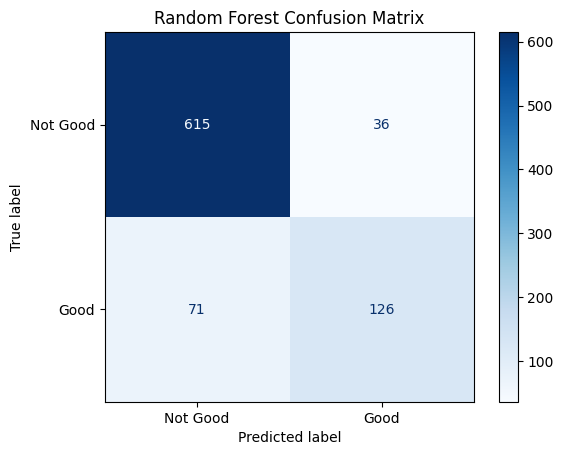

In [74]:
print("\nStep 5: Evaluating and comparing model performance...")

# Evaluate Logistic Regression
print("\n--- Logistic Regression Model Evaluation ---")
lr_pred = lr_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")

cm_lr = confusion_matrix(y_test, lr_pred, labels=lr_pipeline.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Good', 'Good'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Evaluate Random Forest
print("\n--- Random Forest Model Evaluation ---")
rf_pred = rf_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")

cm_rf = confusion_matrix(y_test, rf_pred, labels=rf_pipeline.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Good', 'Good'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

